In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import matplotlib.dates as md
import datetime as datetime

In [19]:
filtered_full_comm_and_no_comm = pd.read_csv('C:/Users/sfine/Documents/sam_coding/brightsource_projects/last_connection/full_comm_test/All_results/filtered_full_comm_and_never_comm.csv')
filtered_full_comm_and_no_comm.drop('Unnamed: 0.1', inplace = True, axis=1)

filtered_full_comm_and_no_comm

,Unnamed: 0,2022-12-08,2022-12-09,2022-12-10,2022-12-11,2022-12-12,2022-12-13,2022-12-14,2022-12-15,2022-12-16,...,2023-05-05,2023-05-06,2023-05-07,2023-05-08,2023-05-09,2023-05-10,2023-05-11,2023-05-12,2023-05-13,2023-05-14
0,1,146.0,350.0,364.0,412.0,398.0,402.0,625.0,406.0,303.0,...,423,425,681,443,410,415,417,425,420,428
1,2,161.0,374.0,373.0,430.0,462.0,406.0,634.0,398.0,529.0,...,428,420,681,446,418,419,419,423,416,429
2,3,148.0,354.0,364.0,411.0,421.0,458.0,620.0,401.0,312.0,...,429,422,685,444,416,420,416,425,416,412
3,4,148.0,356.0,368.0,413.0,408.0,414.0,613.0,403.0,530.0,...,429,424,685,450,422,422,420,428,421,435
4,5,427.0,707.0,697.0,696.0,673.0,690.0,691.0,520.0,555.0,...,431,422,662,440,417,421,422,427,423,427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69657,70375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
69658,70376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,439,429,443,429,424,420,425,437,423,429
69659,70377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,439,433,440,427,425,425,415,432,427,431
69660,70378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
data = filtered_full_comm_and_no_comm.loc[filtered_full_comm_and_no_comm['Unnamed: 0']==383].iloc[:,1:].values[0]
t=filtered_full_comm_and_no_comm.columns[1:].values
dates_list = [datetime.datetime.strptime(date, '%Y-%m-%d').date() for date in t]
data

array([  2.,  31.,  27.,   4.,   5., 135., 116.,  86.,  24.,  78., 185.,
       197.,   8.,  12.,  21.,  18., 100.,  39.,  19.,   5.,  52.,  14.,
        33.,  50.,  99.,  50.,  15.,  15.,  25.,  37.,  22.,  52., 106.,
        17.,  27.,  35.,  47., 193.,  13.,  22.,  24.,  17.,  64.,  40.,
        48.,  12.,  32.,   9.,   5.,  73.,  41.,  52.,  59.,  96.,  84.,
        15.,  18.,  13.,  13.,  27.,  16.,  10.,  30.,  41.,  77.,  68.,
        38.,  41.,  16.,  41.,  55.,  32.,  54.,  42.,  81., 125.,  47.,
        43.,  24.,  46.,  21.,  39.,  30.,  50.,  39.,  29.,  12.,  35.,
        71.,  26.,  62.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   9.,
        34.,  19.,  14.,   7.,  53.,  36.,  19.,  21.,  12.,  13.,  12.,
        17.,  25.,  28.,  18.,  20.,  42.,  49.,  49.,  19.,   5.,  21.,
        10.,  46.,  39.,  24.,   0.,   9.,   9.,  25.,  14.,  23.,  37.,
        13.,  15.,  28.,  10.,  15.,  17.,  16.,  11.,  16.,  15.,  38.,
         9.,  15.,  16.,  24.,  25.,  44.,  33.,  1

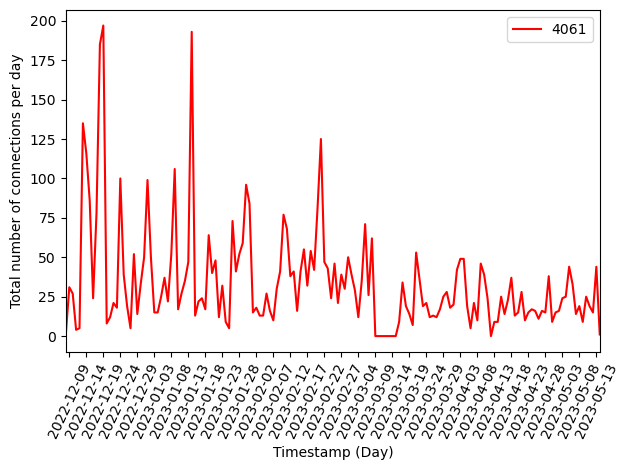

In [21]:
fig, ax = plt.subplots()

ax.plot(dates_list,data,color='r',linewidth=1.5,label='4061')
ax.set_xlabel('Timestamp (Day)')
ax.set_ylabel('Total number of connections per day')
ax.set_xlim(dates_list[0],dates_list[-1])
ax.legend()
xloc = md.DayLocator(interval=5)
ax.xaxis.set_major_locator(xloc)
ax.xaxis.set_major_formatter(md.DateFormatter("%Y-%m-%d"))
fig.autofmt_xdate(rotation=65, ha='center')
fig.tight_layout()
plt.show()

In [28]:
n = len(t)
fhat = np.fft.fft(data,n)  # Compute the FFT
PSD = fhat * np.conj(fhat)/ n  # Power spectrum (power per freq):this finds the magnitude of each fourier coefficient squared.
#if f is a function of time, then can assume this is connected to power=work/time
freq = (1/(1*n)) * np.arange(n)           # Create x-axis of frequencies in Hz (1 day)
L = np.arange(1,np.floor(3*n/4),dtype='int') # Only plot the first three quarters of freqs(if freq is mostly on one side)


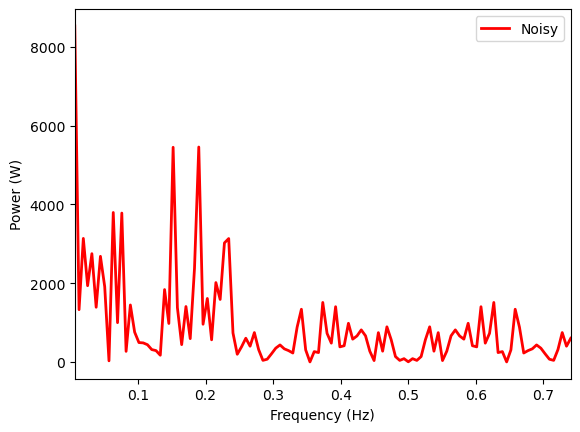

In [29]:
plt.figure()
# plt.plot(freq,PSD,color='r',linewidth=2,label='Noisy')
plt.plot(freq[L],PSD[L],color='r',linewidth=2,label='Noisy') #when freq is lob sided
# plt.plot(freq,PSD,color='r',linewidth=2,label='Noisy') #when freq is lob sided

plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (W)')
# plt.xlim(freq[2],freq[-1])
# plt.ylim(0,6000)

plt.xlim(freq[L[0]],freq[L[-1]])

plt.legend()
plt.show()

In [30]:
indices = PSD > 3000    # Find all freqs with large power (so just plot high power densities in graph below)
PSDclean = PSD * indices  # Zero out all others
fhat = indices * fhat     # Zero out small Fourier coeffs. in Y
ffilt = np.fft.ifft(fhat)


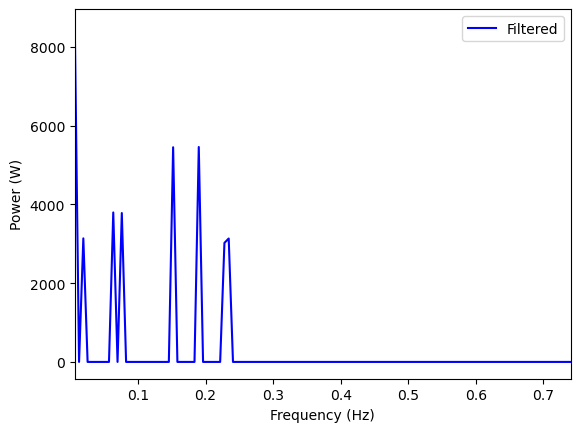

In [31]:
plt.figure()
# plt.plot(freq[L],PSD[L],color='r',linewidth=2,label='Noisy')
# plt.plot(freq,PSDclean,color='b',linewidth=1.5,label='Filtered')

# plt.plot(freq[L],PSD[L],color='r',linewidth=2,label='Noisy') #lob sided
plt.plot(freq[L],PSDclean[L],color='b',linewidth=1.5,label='Filtered')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (W)')
# plt.xlim(freq[0],freq[-1])
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()
plt.show()

C:\Users\sfine\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


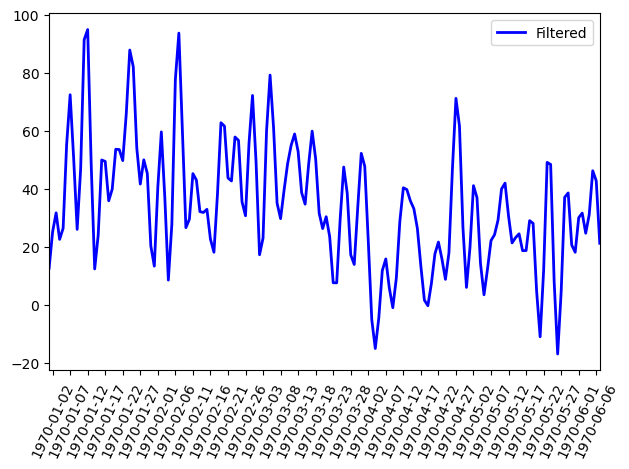

In [9]:
fig, ax = plt.subplots()
ax.plot(t,ffilt,color='b',linewidth=2,label='Filtered')
x = plt.gca()
line = x.lines[0]
y=line.get_xydata()
ax.set_xlim(t[0],t[-1])
xloc = md.DayLocator(interval=5)
ax.xaxis.set_major_locator(xloc)
ax.xaxis.set_major_formatter(md.DateFormatter("%Y-%m-%d"))
fig.autofmt_xdate(rotation=65, ha='center')
fig.tight_layout()

plt.legend()
plt.show()

In [32]:
y

array([[  0.        ,  12.60030238],
       [  1.        ,  25.13757292],
       [  2.        ,  31.69211581],
       [  3.        ,  22.55944939],
       [  4.        ,  26.364558  ],
       [  5.        ,  55.23366897],
       [  6.        ,  72.39331229],
       [  7.        ,  50.52809036],
       [  8.        ,  25.99658851],
       [  9.        ,  46.84112302],
       [ 10.        ,  91.35320265],
       [ 11.        ,  94.84314321],
       [ 12.        ,  48.4549129 ],
       [ 13.        ,  12.3697351 ],
       [ 14.        ,  24.02901558],
       [ 15.        ,  49.9038928 ],
       [ 16.        ,  49.41823185],
       [ 17.        ,  35.84549864],
       [ 18.        ,  39.86940913],
       [ 19.        ,  53.61100169],
       [ 20.        ,  53.51264858],
       [ 21.        ,  49.7025824 ],
       [ 22.        ,  65.76462334],
       [ 23.        ,  87.79044519],
       [ 24.        ,  82.01538232],
       [ 25.        ,  54.04512717],
       [ 26.        ,  41.61630732],
 